##### __Color Quantization__ is a process of reducing the number of colors in an image. 
Color quantization is a critical point for displaying images on certain devices that can only display a limited
number of colors.

In [18]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [19]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

fig = plt.figure(figsize=(12, 10))
plt.suptitle("Color Quantization using K-Means",fontsize=14)
plt.rcParams['figure.facecolor']  = 'silver'

<Figure size 864x720 with 0 Axes>

In [20]:
#Loading Image
img = cv2.imread("images/landscape_1.jpg")

In [21]:
def color_quantization(image, k):
    """Performs color quantization using K-Means Clustering Algorithm"""

    #transform image into 'data'
    data = np.float32(image).reshape((-1, 3))
    #print(data.shape)

    #Defining Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    #Applying K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    #At this point, we can make the image with K color
    #convert center to uint8 

    center = np.uint8(center)
    #replace pixel values with their center value
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

In [22]:
color_k_3 = color_quantization(img, 3)
color_k_5 = color_quantization(img, 5)
color_k_10 = color_quantization(img, 10)
color_k_20 = color_quantization(img, 20)
color_k_40 = color_quantization(img, 40)

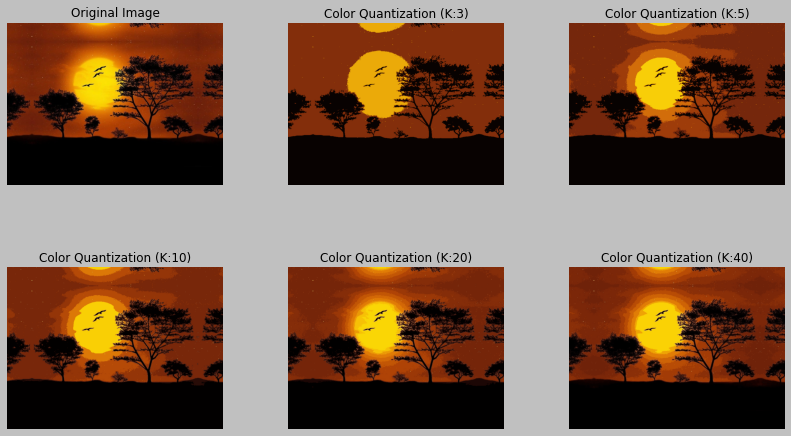

In [23]:
#Plotting the images

img_plt(img, "Original Image", 1)
img_plt(color_k_3, "Color Quantization (K:3)", 2)
img_plt(color_k_5, "Color Quantization (K:5)", 3)
img_plt(color_k_10, "Color Quantization (K:10)", 4)
img_plt(color_k_20, "Color Quantization (K:20)", 5)
img_plt(color_k_40, "Color Quantization (K:40)", 6)

plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()